<a href="https://colab.research.google.com/github/Mateo289/Digital_Signal_Processing/blob/main/Tareas/Tarea_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Como se calcula Fourier cuando las muestras no están uniformemente muestreadas

El cálculo de la Transformada de Fourier (o su equivalente discreto, como la DFT o FFT) está diseñado para conjuntos de datos con un muestreo uniforme. Sin embargo, si las muestras no están uniformemente distribuidas en el dominio temporal, el cálculo requiere métodos específicos, como la Transformada de Fourier No Uniforme (NUFFT, por sus siglas en inglés)


#Problema inicial: Señal no uniformemente muestreada
Supongamos que tienes una señal 𝑥(𝑡) muestreada en tiempos 𝑡𝑖, pero los puntos 𝑡𝑖 no están equidistantes.

Por ejemplo:

t = [0, 0.1, 0.15, 0.3, 0.5, 0.8]

y las correspondientes muestras son:

x = [1.0, 0.8, 0.6, 0.4, 0.2, 0.1]

Queremos encontrar los coeficientes espectrales
𝑋(𝑓) para frecuencias 𝑓

#Transformada de Fourier discreta no uniforme
La Transformada de Fourier continua está definida como:

$$
X(f) = \int_{-\infty}^{\infty} x(t) e^{-j 2\pi ft} \, dt.
$$

Para datos muestreados (uniformes o no), se aproxima como una suma:

$$
X(f_k) = \sum_{i=1}^N x(t_i) e^{-j 2\pi f_k t_i}.
$$

Aquí:

- \( t_i \): Tiempo en el que fue tomada la \( i \)-ésima muestra.
- \( x(t_i) \): Valor de la señal en \( t_i \).
- \( f_k \): Frecuencia para la cual queremos calcular el coeficiente espectral.

#Ejemplo práctico:
Usaremos los tiempos y valores dados:



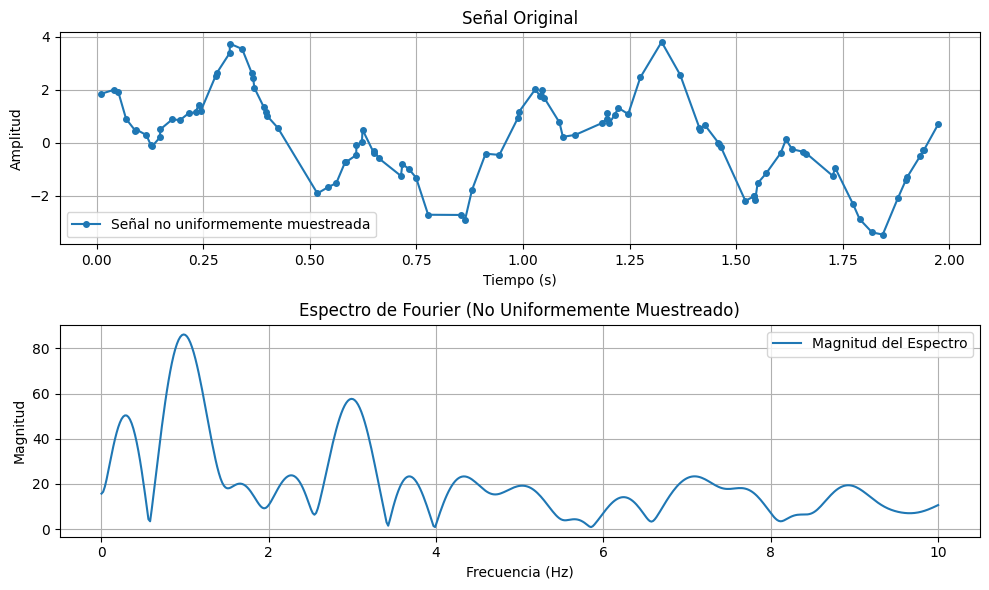

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos de ejemplo
np.random.seed(42)  # Fijar la semilla para reproducibilidad

# Tiempos no uniformes
t = np.sort(np.random.uniform(0, 2, 100))  # 100 puntos en el rango [0, 2] s

# Señal compuesta por múltiples frecuencias + ruido
x = (
    2 * np.sin(2 * np.pi * 1 * t) +  # Componente a 1 Hz
    1.5 * np.cos(2 * np.pi * 3 * t) +  # Componente a 3 Hz
    0.5 * np.sin(2 * np.pi * 7 * t) +  # Componente a 7 Hz
    np.random.normal(0, 0.2, len(t))  # Ruido gaussiano
)

# Frecuencias de interés para la transformada
frequencies = np.linspace(0, 10, 500)  # Frecuencias en el rango [0, 10] Hz

# Cálculo de la transformada de Fourier no uniforme
X = []
for f in frequencies:
    X_f = np.sum(x * np.exp(-1j * 2 * np.pi * f * t))  # Suma ponderada
    X.append(X_f)

# Convertir a magnitudes
X_magnitude = np.abs(X)

# Graficar resultados
plt.figure(figsize=(10, 6))

# Gráfico de la señal en el dominio del tiempo
plt.subplot(2, 1, 1)
plt.plot(t, x, 'o-', label="Señal no uniformemente muestreada", markersize=4)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Señal Original")
plt.grid()
plt.legend()

# Gráfico del espectro de Fourier
plt.subplot(2, 1, 2)
plt.plot(frequencies, X_magnitude, label="Magnitud del Espectro")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.title("Espectro de Fourier (No Uniformemente Muestreado)")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
